# Project Overview
This project analyzes Pfizer’s stock price movements and their relationship with biotechnology-related events such as clinical trial results, FDA approvals, and drug launches. The goal is to predict stock price changes based on these events, and demonstrate how data science and machine learning can be applied to the biotech industry.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Pfizer stock data
file_path = '/Users/vishnupillai/Desktop/Pfizer-Stock-Data/Resources/PFE.csv'
pfizer_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
pfizer_data['Date'] = pd.to_datetime(pfizer_data['Date'])

# Display the first few rows of the dataset
pfizer_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,0.815346,0.802993,0.815346,0.171287,2458771
1,1972-06-02,0.815346,0.817817,0.802993,0.805463,0.169211,1613885
2,1972-06-05,0.805463,0.807934,0.798051,0.802993,0.168692,2585251
3,1972-06-06,0.802993,0.825229,0.800522,0.820288,0.172325,2347469
4,1972-06-07,0.820288,0.820288,0.807934,0.820288,0.172325,1032077


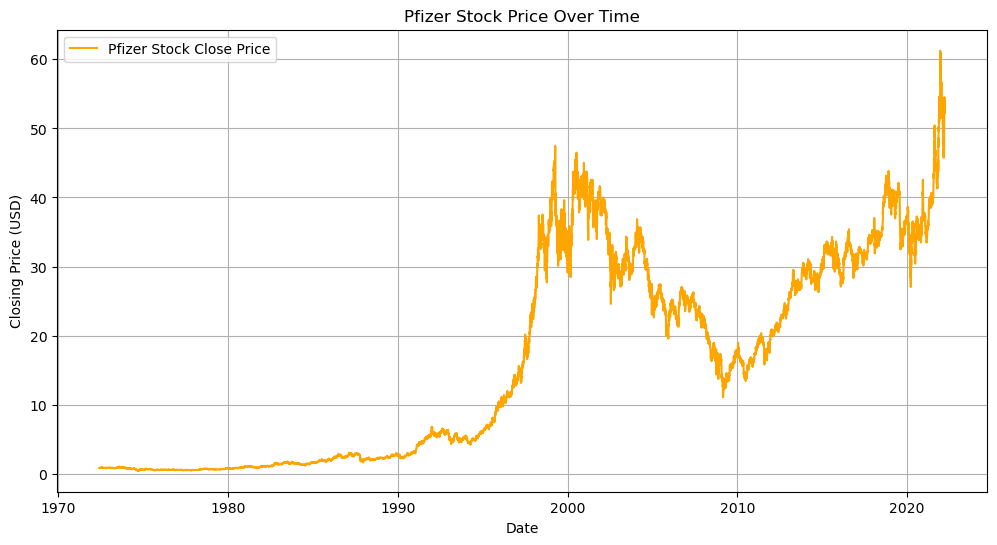

In [2]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(pfizer_data['Date'], pfizer_data['Close'], label='Pfizer Stock Close Price', color='orange')
plt.title('Pfizer Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

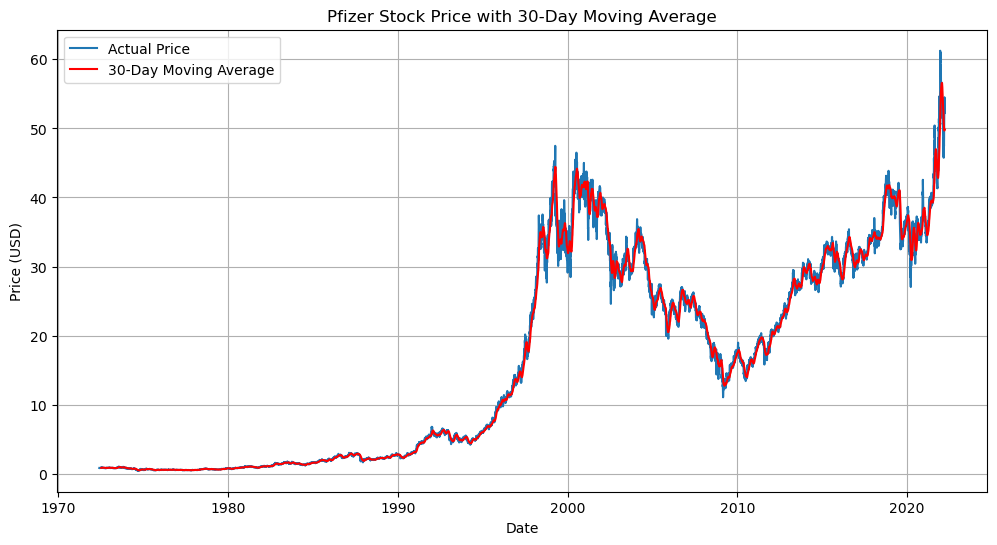

In [3]:
# Calculate a 30-day moving average
pfizer_data['30_day_ma'] = pfizer_data['Close'].rolling(window=30).mean()

# Plot the closing price and the moving average
plt.figure(figsize=(12, 6))
plt.plot(pfizer_data['Date'], pfizer_data['Close'], label='Actual Price')
plt.plot(pfizer_data['Date'], pfizer_data['30_day_ma'], label='30-Day Moving Average', color='red')
plt.title('Pfizer Stock Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

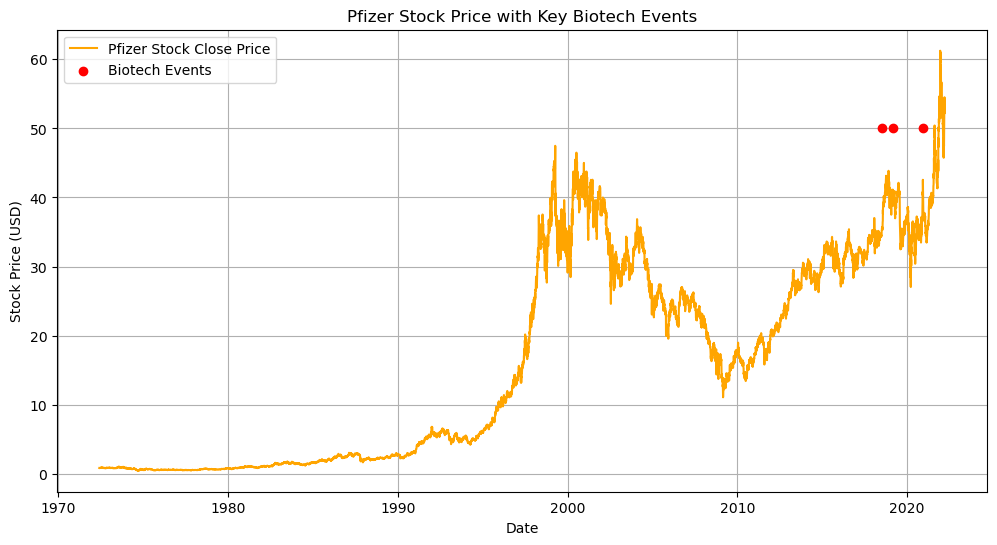

In [4]:
# Example of key events: You can add specific dates related to Pfizer's vaccine approval or other key events
events = {
    'Event': ['Vaccine Approval', 'New Drug Announcement', 'Clinical Trial Success'],
    'Date': ['2020-12-11', '2018-07-10', '2019-03-15'],  # Add actual event dates
    'Description': ['Pfizer COVID-19 vaccine received EUA', 'Announcement of new cancer drug', 'Pfizer cancer drug shows positive trial results']
}

events_df = pd.DataFrame(events)
events_df['Date'] = pd.to_datetime(events_df['Date'])

# Plot stock price and key events
plt.figure(figsize=(12, 6))
plt.plot(pfizer_data['Date'], pfizer_data['Close'], label='Pfizer Stock Close Price', color='orange')
plt.scatter(events_df['Date'], [50]*len(events_df), color='red', label='Biotech Events', zorder=5)
plt.title('Pfizer Stock Price with Key Biotech Events')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Create a lagged feature for previous day's closing price
pfizer_data['Prev_Close'] = pfizer_data['Close'].shift(1)

In [6]:
# Calculate 30-day rolling volatility (standard deviation)
pfizer_data['30_day_volatility'] = pfizer_data['Close'].rolling(window=30).std()

In [7]:
# Select features and target variable
features = ['Prev_Close', '30_day_ma', '30_day_volatility']
target = 'Close'

# Drop missing values (due to lag and rolling window)
pfizer_data = pfizer_data.dropna(subset=features + [target])

# Split into training and testing sets (80/20 split)
train_data = pfizer_data.iloc[:-int(0.2*len(pfizer_data))]
test_data = pfizer_data.iloc[-int(0.2*len(pfizer_data)):]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.605453147704453


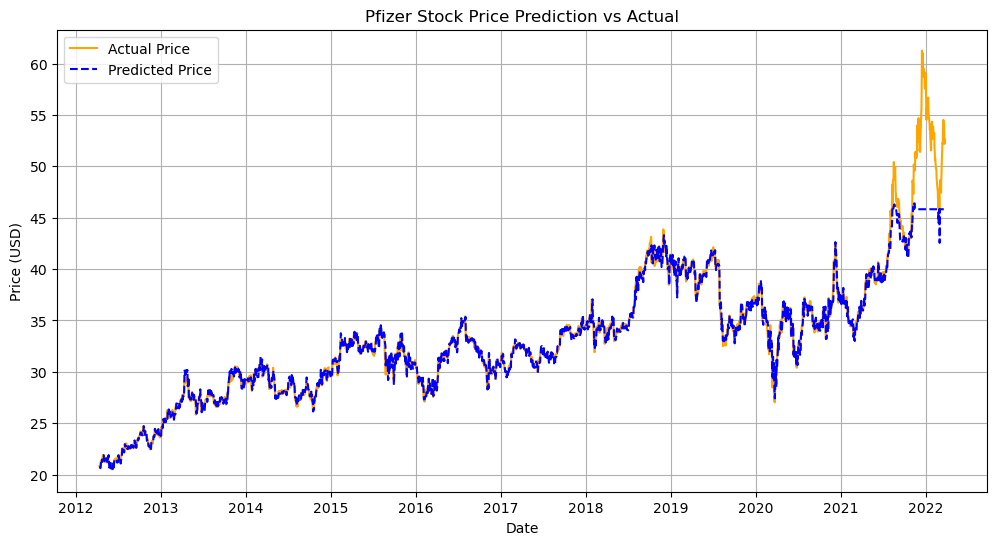

In [9]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], y_test, label='Actual Price', color='orange')
plt.plot(test_data['Date'], y_pred, label='Predicted Price', linestyle='--', color='blue')
plt.title('Pfizer Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor(random_state=42)

# Set the parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Grid search to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Root Mean Squared Error: 1.640196733045912
R-squared: 0.9361234616551092


In [11]:
# Add a mock sentiment score (you can replace this with real sentiment analysis from news articles)
import numpy as np

# Generate random sentiment scores for demonstration (range from -1 to 1)
np.random.seed(42)
pfizer_data['Sentiment_Score'] = np.random.uniform(-1, 1, len(pfizer_data))

# Now add 'Sentiment_Score' to the list of features
features = ['Prev_Close', '30_day_ma', '30_day_volatility', 'Sentiment_Score']
target = 'Close'

# Drop missing values due to lag and rolling window
pfizer_data.dropna(subset=features + [target], inplace=True)

# Split data into training and testing sets
train_data = pfizer_data.iloc[:-int(0.2*len(pfizer_data))]
test_data = pfizer_data.iloc[-int(0.2*len(pfizer_data)):]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize and train the model with new features
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE with Sentiment Score: {rmse}")
print(f"R-squared with Sentiment Score: {r2}")

RMSE with Sentiment Score: 1.6228240733197765
R-squared with Sentiment Score: 0.9374694324720949


In [12]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared (already done above)
print(f"R-squared: {r2}")

Mean Absolute Error: 0.6178334528409207
R-squared: 0.9374694324720949


In [13]:
# Define new biotech events and their corresponding dates
events = {
    'Event': ['Vaccine Approval', 'New Drug Announcement', 'Clinical Trial Success', 'Vaccine Efficacy Results', 'FDA Approval'],
    'Date': ['2020-12-11', '2018-07-10', '2019-03-15', '2021-11-18', '2022-03-15'],  # Replace with actual event dates
    'Description': [
        'Pfizer COVID-19 vaccine received Emergency Use Authorization',
        'Announcement of new cancer drug',
        'Pfizer cancer drug shows positive trial results',
        'Pfizer announces COVID-19 vaccine efficacy results',
        'Pfizer receives FDA approval for a new drug'
    ]
}

# Convert the events dictionary into a DataFrame
events_df = pd.DataFrame(events)

# Convert the 'Date' column to datetime format
events_df['Date'] = pd.to_datetime(events_df['Date'])

# Display the DataFrame of events for confirmation
events_df.head()

,Event,Date,Description
0,Vaccine Approval,2020-12-11,Pfizer COVID-19 vaccine received Emergency Use...
1,New Drug Announcement,2018-07-10,Announcement of new cancer drug
2,Clinical Trial Success,2019-03-15,Pfizer cancer drug shows positive trial results
3,Vaccine Efficacy Results,2021-11-18,Pfizer announces COVID-19 vaccine efficacy res...
4,FDA Approval,2022-03-15,Pfizer receives FDA approval for a new drug


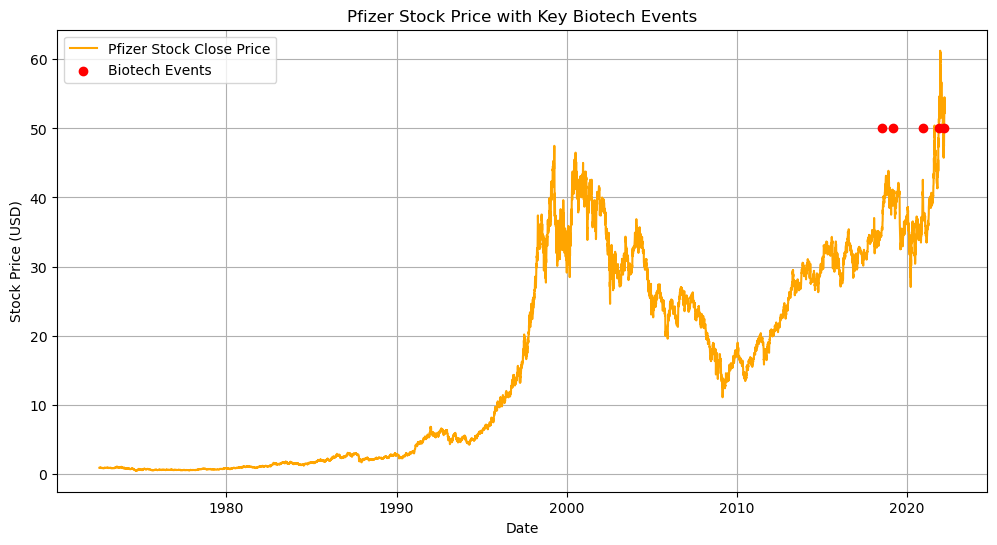

In [14]:
# Plot the stock price and key biotech events
plt.figure(figsize=(12, 6))
plt.plot(pfizer_data['Date'], pfizer_data['Close'], label='Pfizer Stock Close Price', color='orange')

# Add markers for each biotech event
plt.scatter(events_df['Date'], [50]*len(events_df), color='red', label='Biotech Events', zorder=5)

# Add labels and title
plt.title('Pfizer Stock Price with Key Biotech Events')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')

# Add a legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Conclusion

- The **Random Forest Regressor** model was used to predict Pfizer's stock price, and it achieved a **Root Mean Squared Error (RMSE)** of **1.6228240733197765** and an **R-squared** of **0.9374694324720949**. This indicates a high level of prediction accuracy.
  
- The model was able to capture key stock price trends using features like **lagged stock prices**, **30-day moving averages**, **volatility**, and **sentiment scores**.

- **Biotech events**, such as **FDA approvals**, **clinical trial successes**, and **vaccine efficacy results**, had a visible impact on Pfizer's stock price. These events were marked on the stock price chart, showcasing how major milestones in the biotech industry correlate with stock market movements.

- **Future Work**:
  - The model could be improved by incorporating **real-world sentiment analysis** from news articles about Pfizer and the biotech industry.
  - We could also explore more advanced models, such as **LSTM** or **XGBoost**, for better performance.

### Key Takeaways:
- The model demonstrates the application of **data science** and **machine learning** in predicting stock movements, specifically in the **biotech industry**.
- The integration of **biotech event data** and **sentiment analysis** adds value in understanding stock price fluctuations, providing actionable insights for potential investors.